In [1]:
!pip install spacy

In [3]:
import spacy

In [4]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 2.8 MB/s eta 0:00:05
     ---- ----------------------------------- 1.3/12.8 MB 1.8 MB/s eta 0:00:07
     ---- ----------------------------------- 1.6/12.8 MB 1.6 MB/s eta 0:00:08
     ----- ---------------------------------- 1.8/12.8 MB 1.6 MB/s eta 0:00:07
     ----- ---------------------------------- 1.8/12.8 MB 1.6 MB/s eta 0:00:07
     ------ --------------------------------- 2.1/12.8 MB 1.4 MB/s eta 0:00:08
     -------- ------------------------------- 2.6/12.8 MB 1.4 MB/s eta 0:00:08
     -------- ------------------------------- 2.6/12.8 MB 1.4 MB/s eta 0:00:08
     --------- ------------------------------ 3.1/12.8 MB 1.4 MB/s eta 0:00:08
     ---------- ----------------------------- 3.4/12.8 MB 1.4 MB/s

In [7]:
nlp = spacy.load("en_core_web_sm")

In [8]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x1d9f9837c50>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x1d9f9835f10>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1d9f98ed0e0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x1d9fab27890>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x1d9fab4f110>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1d9f98ed1c0>)]

In [11]:
import pandas as pd
data=pd.read_excel("Swiggy30 (1).xlsx")

In [13]:
data.head()

,App,review_date,review_description,rating,thumbsUpCount,developer_response,developer_response_date,appVersion
0,Swiggy,2023-07-24 09:57:40,I have been using swiggy for a long time and I...,2,103,"Hey there, we apologize for the inconvenience ...",2023-07-24 10:02:21,4.37.2
1,Swiggy,2023-07-23 10:35:23,Worst experiences I'm having with the app for ...,1,12,"Hello, we would like to know more about it. Pl...",2023-07-23 10:42:22,4.37.2
2,Swiggy,2023-07-24 14:48:26,The best foolishing app with offers. The app o...,1,7,We are sorry to let you down. Please write to ...,2023-07-24 14:52:22,4.37.2
3,Swiggy,2023-07-07 08:26:00,Title: Disappointing Experience with Swiggy In...,1,85,"Hey there, we are sorry to have put you throug...",2023-07-07 08:32:20,4.36.1
4,Swiggy,2023-07-19 07:40:05,Worst ever experience. I ordered from instamar...,1,29,We're apologetic about this experience you've ...,2023-07-19 07:42:22,4.36.3


In [15]:
data.shape

(30, 8)

In [17]:
data1 = data.loc[:, ["review_description", "rating"]]

In [19]:
data1.head()

,review_description,rating
0,I have been using swiggy for a long time and I...,2
1,Worst experiences I'm having with the app for ...,1
2,The best foolishing app with offers. The app o...,1
3,Title: Disappointing Experience with Swiggy In...,1
4,Worst ever experience. I ordered from instamar...,1


In [21]:
def preprocess_text(text):
    doc= nlp(text)
    tokens=[
        token.lemma_.lower() for token in  doc
        if not token.is_stop and not token.is_punct
    ]
    return " ".join(tokens)

In [23]:
data1["c_r"]=data1['review_description'].astype(str).apply(preprocess_text)

In [25]:
data1.head()

,review_description,rating,c_r
0,I have been using swiggy for a long time and I...,2,swiggy long time work fine untill encounter er...
1,Worst experiences I'm having with the app for ...,1,bad experience have app couple month today bad...
2,The best foolishing app with offers. The app o...,1,well foolishe app offer app offer like item fr...
3,Title: Disappointing Experience with Swiggy In...,1,title disappointing experience swiggy instamar...
4,Worst ever experience. I ordered from instamar...,1,bad experience order instamart get item compla...


In [27]:
if 'c_r' in data1.columns:
    for text in data1['c_r']:
        doc = nlp(text)
        for token in doc:
            print(token.text, token.pos_)
else:
    print("Column 'c_r' not found in the DataFrame.")

swiggy ADJ
long ADJ
time NOUN
work VERB
fine ADJ
untill NOUN
encounter NOUN
error NOUN
offer NOUN
buy VERB
swiggy ADJ
app NOUN
work NOUN
actually ADV
try VERB
proceed VERB
buy VERB
swiggy ADJ
membership NOUN
think VERB
big ADJ
company NOUN
let VERB
bug NOUN
persist ADJ
consumer NOUN
app NOUN
resolution NOUN
report NOUN
senseless ADJ
software NOUN
developer NOUN
like ADP
reason NOUN
eat VERB
2 NUM
star NOUN
bad ADJ
experience NOUN
have AUX
app NOUN
couple NOUN
month NOUN
today NOUN
bad ADJ
irresponsible ADJ
delivery NOUN
partner NOUN
app NOUN
bad ADJ
customer NOUN
support NOUN
horrible ADJ
prefer NOUN
give VERB
1 NUM
rating NOUN
want VERB
feedback NOUN
app NOUN
ask VERB
feedback NOUN
hope NOUN
well INTJ
competition NOUN
people NOUN
soon ADV
apart ADV
zomato PROPN
market NOUN
good ADJ
salute NOUN
delivery NOUN
partner NOUN
work VERB
hard ADJ
experience NOUN
well INTJ
foolishe ADJ
app NOUN
offer VERB
app NOUN
offer NOUN
like ADP
item NOUN
free ADJ
order NOUN
199 NUM
deliver VERB
item NOUN

In [29]:
def preprocess_pos(text):
    """Process text and return tokens with POS tags joined by spaces."""
    doc = nlp(str(text))  # Ensure input is string
    tok = [f"{token.text}_{token.pos_}" for token in doc]
    return " ".join(tok)


In [31]:
data1["c_r_pos"]=data1['c_r'].astype(str).apply(preprocess_pos)

In [33]:
data1.head()

,review_description,rating,c_r,c_r_pos
0,I have been using swiggy for a long time and I...,2,swiggy long time work fine untill encounter er...,swiggy_ADJ long_ADJ time_NOUN work_VERB fine_A...
1,Worst experiences I'm having with the app for ...,1,bad experience have app couple month today bad...,bad_ADJ experience_NOUN have_AUX app_NOUN coup...
2,The best foolishing app with offers. The app o...,1,well foolishe app offer app offer like item fr...,well_INTJ foolishe_ADJ app_NOUN offer_VERB app...
3,Title: Disappointing Experience with Swiggy In...,1,title disappointing experience swiggy instamar...,title_NOUN disappointing_ADJ experience_NOUN s...
4,Worst ever experience. I ordered from instamar...,1,bad experience order instamart get item compla...,bad_ADJ experience_NOUN order_NOUN instamart_V...


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
vect=TfidfVectorizer(max_features=5000)
data1["vect"] = vect.fit_transform(data1["c_r"]).toarray().tolist()

In [127]:
data1.head()

,review_description,rating,c_r,c_r_pos,vect
0,I have been using swiggy for a long time and I...,2,swiggy long time work fine untill encounter er...,swiggy_ADJ long_ADJ time_NOUN work_VERB fine_A...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Worst experiences I'm having with the app for ...,1,bad experience have app couple month today bad...,bad_ADJ experience_NOUN have_AUX app_NOUN coup...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,The best foolishing app with offers. The app o...,1,well foolishe app offer app offer like item fr...,well_INTJ foolishe_ADJ app_NOUN offer_VERB app...,"[0.0, 0.26145079279094735, 0.0, 0.0, 0.0, 0.0,..."
3,Title: Disappointing Experience with Swiggy In...,1,title disappointing experience swiggy instamar...,title_NOUN disappointing_ADJ experience_NOUN s...,"[0.0, 0.0, 0.0, 0.16213516333545072, 0.0, 0.0,..."
4,Worst ever experience. I ordered from instamar...,1,bad experience order instamart get item compla...,bad_ADJ experience_NOUN order_NOUN instamart_V...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [129]:
x=data1["vect"]
y=data1["rating"]

In [131]:
data1["rating"].unique

<bound method Series.unique of 0     2
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    5
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    3
26    1
27    1
28    1
29    1
Name: rating, dtype: int64>

In [133]:
data1["rating"].value_counts()

rating
1    27
2     1
5     1
3     1
Name: count, dtype: int64

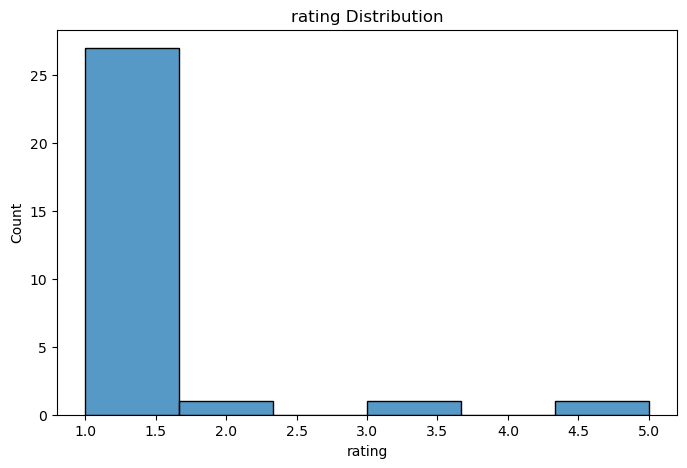

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(data1['rating'], kde=False)
plt.title("rating Distribution")
plt.show()

In [137]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import SimpleRNN, Dense

In [139]:
from imblearn.over_sampling import SMOTE


In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [123]:
import numpy as np
from tensorflow.keras.models import Sequential
n_samples = 100
timesteps = 10
features = 5
x_train = np.random.rand(n_samples, timesteps, features)
y_train = np.random.randint(0, 2, n_samples)


X_train_2d = x_train.reshape(n_samples, -1)  # Flatten timesteps and features


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_2d, y_train)


n_resampled = X_resampled.shape[0]
X_resampled_rnn = X_resampled.reshape(n_resampled, timesteps, features)


model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(timesteps, features)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_resampled_rnn, y_resampled, epochs=10, batch_size=32)

C:\Users\Madhan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5774 - loss: 0.6848
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4912 - loss: 0.6879 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4927 - loss: 0.6872
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5192 - loss: 0.6842
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5286 - loss: 0.6821
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5152 - loss: 0.6889
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5759 - loss: 0.6768
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5697 - loss: 0.6773 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5365 - loss: 0.6772
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5471 - loss: 0.6757


In [98]:
loss, accuracy = model.evaluate(X_resampled_rnn, y_resampled)
print(f"Accuracy: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6344 - loss: 0.6732 
Accuracy: 0.67


In [99]:
x_train.shape

(100, 10, 5)

In [100]:
y_train.shape

(100,)

In [103]:
data1.head()

,review_description,rating,c_r,c_r_pos,vect
0,I have been using swiggy for a long time and I...,2,swiggy long time work fine untill encounter er...,swiggy_ADJ long_ADJ time_NOUN work_VERB fine_A...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,Worst experiences I'm having with the app for ...,1,bad experience have app couple month today bad...,bad_ADJ experience_NOUN have_AUX app_NOUN coup...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,The best foolishing app with offers. The app o...,1,well foolishe app offer app offer like item fr...,well_INTJ foolishe_ADJ app_NOUN offer_VERB app...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Title: Disappointing Experience with Swiggy In...,1,title disappointing experience swiggy instamar...,title_NOUN disappointing_ADJ experience_NOUN s...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."
4,Worst ever experience. I ordered from instamar...,1,bad experience order instamart get item compla...,bad_ADJ experience_NOUN order_NOUN instamart_V...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


In [104]:
data1['output'] = ['positive' if rating >= 3 else 'negative' for rating in data1['rating']]    

In [105]:
data1

,review_description,rating,c_r,c_r_pos,vect,output
0,I have been using swiggy for a long time and I...,2,swiggy long time work fine untill encounter er...,swiggy_ADJ long_ADJ time_NOUN work_VERB fine_A...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",negative
1,Worst experiences I'm having with the app for ...,1,bad experience have app couple month today bad...,bad_ADJ experience_NOUN have_AUX app_NOUN coup...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",negative
2,The best foolishing app with offers. The app o...,1,well foolishe app offer app offer like item fr...,well_INTJ foolishe_ADJ app_NOUN offer_VERB app...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",negative
3,Title: Disappointing Experience with Swiggy In...,1,title disappointing experience swiggy instamar...,title_NOUN disappointing_ADJ experience_NOUN s...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...",negative
4,Worst ever experience. I ordered from instamar...,1,bad experience order instamart get item compla...,bad_ADJ experience_NOUN order_NOUN instamart_V...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",negative
5,I got expired items in instamart and support s...,1,get expire item instamart support say forward ...,get_VERB expire_VERB item_NOUN instamart_ADJ s...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",negative
6,"Overpriced. When i order multiple items, the r...",1,overpriced order multiple item restaurant miss...,overpriced_VERB order_NOUN multiple_ADJ item_N...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",negative
7,Worst Fraud app. They want us yo cancel the or...,1,worst fraud app want yo cancel order minute ca...,worst_ADJ fraud_NOUN app_PROPN want_VERB yo_PR...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",negative
8,Honest Review - - - - There is no option to gi...,1,honest review option zero star week defect ord...,honest_ADJ review_NOUN option_NOUN zero_NUM st...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",negative
9,"Worst delivery experience, if we placed an ord...",1,bad delivery experience place order delivery p...,bad_ADJ delivery_NOUN experience_NOUN place_NO...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",negative
